<a href="https://colab.research.google.com/github/yooromy/yoo/blob/master/250513_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Diffusion Models을 쉽게 사용하고 훈련할 수 있도록 도와주는 HuggingFace Library
!pip install diffusers

In [2]:
import torch
import os
import requests

from diffusers import StableDiffusionImg2ImgPipeline
from diffusers.utils import make_image_grid
from PIL import Image
from tqdm import tqdm

In [3]:
#url = "https://civitai.com/models/134237/disney-and-pixar-animal"
url = "https://civitai.com/models/65203/disney-pixar-cartoon-type-a"
model_id = url.replace("https://civitai.com/models/", "").split("/")[0]
print(model_id)

65203


In [4]:
response = requests.get(f"https://civitai.com/api/v1/models/{model_id}")
response.json()

{'id': 65203,
 'name': 'Disney Pixar Cartoon Type A',
 'description': '<p>There\'s no good pixar disney looking cartoon model yet so i decided to make one. This is a merge of <a target="_blank" rel="ugc" href="https://civitai.com/models/15773/pixar-style-model">Pixar Style Model</a> with my own Loras to create a generic 3d looking western cartoon. In the examples I Use hires. fix, upscale latent, denoising 0.5, hires steps 20, upscale by 2 . Clip skip 2 . I will upload more variants of this in the future</p><p></p><p>You need to use VAE or the color become pale and gray</p><p></p><p><span style="color:rgb(193, 194, 197)">if you like the models, please consider supporting me on, i will continue to upload more cool stuffs in the future</span></p><p><br /><a target="_blank" rel="ugc" href="https://www.patreon.com/PromptSharingSamaritan">https://www.patreon.com/PromptSharingSamaritan</a></p><p><a target="_blank" rel="ugc" href="http://patreon.com/PromptSharingSamaritan￼"><br /></a><a targe

In [5]:
download_url = response.json()["modelVersions"][0]["downloadUrl"]
filename = response.json()["modelVersions"][0]["files"][0]["name"]
print("download_url:", download_url)
print("filename:", filename)


def download_from_url(url: str, file_path: str, chunk_size=1024):
    resp = requests.get(url, stream=True)
    total = int(resp.headers.get('content-length', 0))
    with open(file_path, 'wb') as file, tqdm(
        desc=file_path,
        total=total,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in resp.iter_content(chunk_size=chunk_size):
            size = file.write(data)
            bar.update(size)


file_path = f"models/{filename}"
os.makedirs("models", exist_ok=True)
print(f"[INFO] Download start!")
download_from_url(download_url, file_path)
print(f"\n[INFO] File downloaded: {file_path}")

download_url: https://civitai.com/api/download/models/69832
filename: disneyPixarCartoon_v10.safetensors
[INFO] Download start!


models/disneyPixarCartoon_v10.safetensors: 100%|██████████| 3.95G/3.95G [01:11<00:00, 59.2MiB/s]


[INFO] File downloaded: models/disneyPixarCartoon_v10.safetensors


In [6]:
pipeline = StableDiffusionImg2ImgPipeline.from_single_file(
        "models/disneyPixarCartoon_v10.safetensors",
        torch_dtype=torch.float16,
        use_safetensors=True,
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [11]:
input_image = Image.open("kitty.png")

prompt = (
    "kitty in the city, cartoon style, drawing, detailed"
)
negative_prompt = "ugly, blurry, bad anatomy, bad art, wierd colors"

output_images = pipeline(
    image=input_image,
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_images_per_prompt=4,
    num_inference_steps=30,
    strength=0.7,
).images

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:781: FutureWarning: You have passed 4 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/21 [00:00<?, ?it/s]

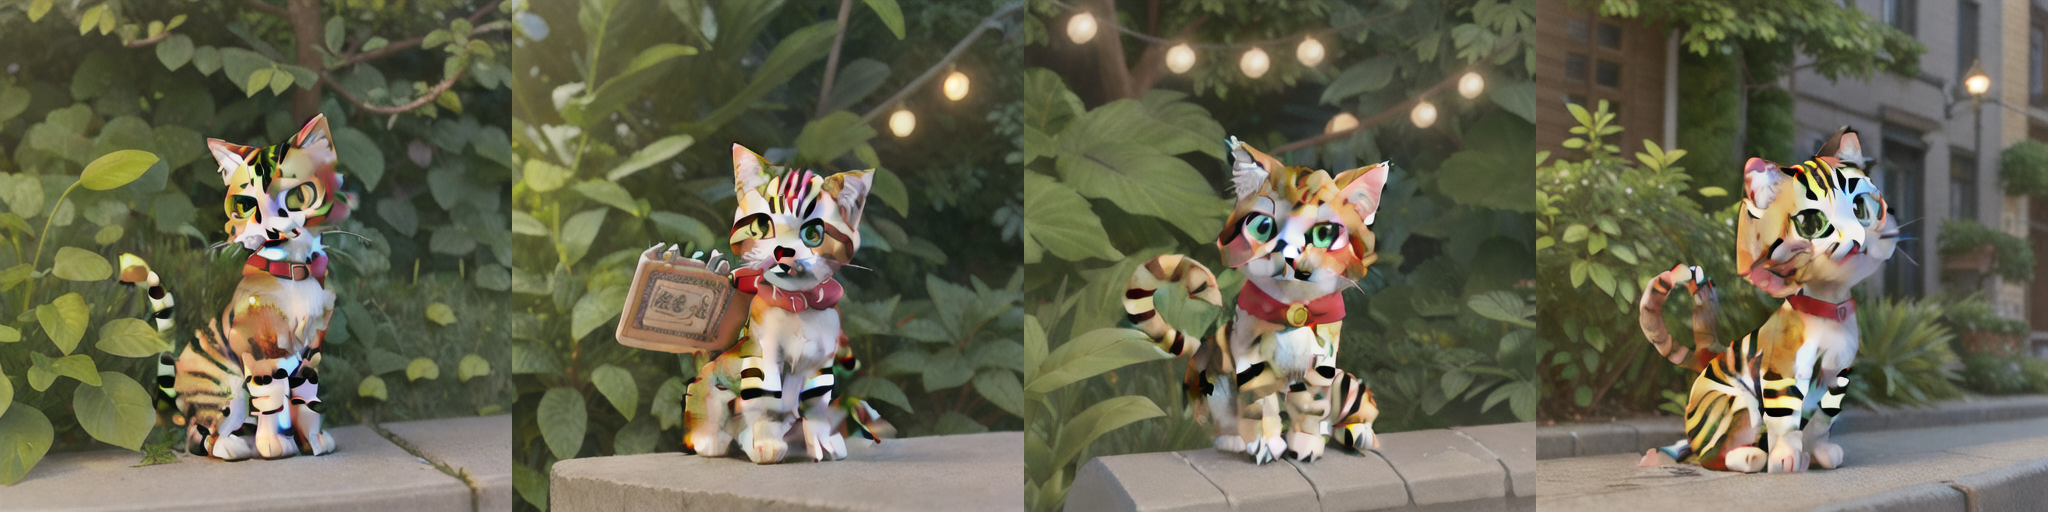

In [12]:

make_image_grid(output_images, rows=1, cols=4)